In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import plotly as py
import plotly.graph_objs as go
# from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
print('I have not picked a dataset yet')

I have not picked a dataset yet


In [99]:
# read in dataset
# 
astro = pd.read_csv("assets/astronauts_cln.csv")
astro.head()

,Name,Astronaut Year,Group,Status,Birth Year,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,...,Occupation Field,Military Rank,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission
0,Jeffrey N. Williams,1996.0,16.0,Active,1958,1/18/58,"Superior, WI",Male,US Military Academy; US Naval Postgraduate Sch...,Applied Science & Engineering,...,Military,Colonel,US Army (Retired),4,12818,5,32.0,"STS-101 (Atlantis), ISS-13 (Soyuz), ISS-21/22 ...",NaN,NaN
1,Scott J. Kelly,1996.0,16.0,Active,1964,2/21/64,"Orange, NJ",Male,State University of New York Maritime College;...,Electrical Engineering,...,Military,Captain,US Navy (Retired),4,12490,3,18.0,"STS-103 (Discovery), STS-118 (Endeavor), ISS-2...",NaN,NaN
2,Peggy A. Whitson,1996.0,16.0,Active,1960,2/9/60,"Mt. Ayr, IA",Female,Iowa Wesleyan College; Rice University,Chemistry & Biology,...,Civilian,NaN,NaN,3,11698,7,46.0,"STS-111/113 (Endeavor), ISS-16 (Soyuz), ISS-50...",NaN,NaN
3,E. Michael Fincke,1996.0,16.0,Active,1967,3/14/67,"Pittsburgh, PA",Male,MIT; Stanford University; University of Housto...,"Aeronautics & Astronautics; Earth, Atmospheric...",...,Military,Colonel,US Air Force,3,9159,9,48.0,"ISS-09 (Soyuz), ISS-18 (Soyuz), STS-134 (Endea...",NaN,NaN
4,C. Michael Foale,1987.0,12.0,Active,1957,1/6/57,"Louth, England",Male,Cambridge University,Physics,...,Civilian,NaN,NaN,6,8970,4,22.0,"STS-45 (Atlantis), STS-56 (Discovery), STS-63 ...",NaN,NaN


In [7]:
#info on dataset
print(astro.columns)
print(astro.shape)
pd.DataFrame(astro.dtypes, columns=["DataTypes"])

Index(['Name', 'Year', 'Group', 'Status', 'Birth Date', 'Birth Place',
       'Gender', 'Alma Mater', 'Undergraduate Major', 'Graduate Major',
       'Military Rank', 'Military Branch', 'Space Flights',
       'Space Flight (hr)', 'Space Walks', 'Space Walks (hr)', 'Missions',
       'Death Date', 'Death Mission'],
      dtype='object')
(357, 19)


,DataTypes
Name,object
Year,float64
Group,float64
Status,object
Birth Date,object
Birth Place,object
Gender,object
Alma Mater,object
Undergraduate Major,object
Graduate Major,object


In [109]:
# split column and add new columns to astro
astro[['Birth City', 'Birth State']] = astro['Birth Place'].str.split(',', expand=True)
# display the dataframe
astro

,Name,Astronaut Year,Group,Status,Birth Year,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,...,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Birth City,Birth State,Space Flight Weeks
0,Jeffrey N. Williams,1996.0,16.0,Active,1958,1/18/58,"Superior, WI",Male,US Military Academy; US Naval Postgraduate Sch...,Applied Science & Engineering,...,4,12818,5,32.0,"STS-101 (Atlantis), ISS-13 (Soyuz), ISS-21/22 ...",NaN,Still alive,Superior,WI,76.0
1,Scott J. Kelly,1996.0,16.0,Active,1964,2/21/64,"Orange, NJ",Male,State University of New York Maritime College;...,Electrical Engineering,...,4,12490,3,18.0,"STS-103 (Discovery), STS-118 (Endeavor), ISS-2...",NaN,Still alive,Orange,NJ,74.0
2,Peggy A. Whitson,1996.0,16.0,Active,1960,2/9/60,"Mt. Ayr, IA",Female,Iowa Wesleyan College; Rice University,Chemistry & Biology,...,3,11698,7,46.0,"STS-111/113 (Endeavor), ISS-16 (Soyuz), ISS-50...",NaN,Still alive,Mt. Ayr,IA,70.0
3,E. Michael Fincke,1996.0,16.0,Active,1967,3/14/67,"Pittsburgh, PA",Male,MIT; Stanford University; University of Housto...,"Aeronautics & Astronautics; Earth, Atmospheric...",...,3,9159,9,48.0,"ISS-09 (Soyuz), ISS-18 (Soyuz), STS-134 (Endea...",NaN,Still alive,Pittsburgh,PA,55.0
4,C. Michael Foale,1987.0,12.0,Active,1957,1/6/57,"Louth, England",Male,Cambridge University,Physics,...,6,8970,4,22.0,"STS-45 (Atlantis), STS-56 (Discovery), STS-63 ...",NaN,Still alive,Louth,England,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Clifton C. Williams Jr.,1963.0,3.0,Deceased,1932,9/26/32,"Mobile, AL",Male,Auburn University,Mechanical Engineering,...,0,0,0,0.0,NaN,24750.0,Still alive,Mobile,AL,0.0
353,Duane E. Graveline,1965.0,4.0,Retired,1931,3/2/31,"Newport, VT",Male,University of Vermont; Johns Hopkins University,NaN,...,0,0,0,0.0,NaN,NaN,Still alive,Newport,VT,0.0
354,Edward G. Givens Jr.,1966.0,5.0,Deceased,1930,1/5/30,"Quanah, TX",Male,US Naval Academy,Naval Sciences,...,0,0,0,0.0,NaN,24629.0,Still alive,Quanah,TX,0.0
355,Jeanette J. Epps,2009.0,20.0,Active,1970,11/3/70,"Syracuse, NY",Female,LeMoyne College; University of Maryland,Physics,...,0,0,0,0.0,NaN,NaN,Still alive,Syracuse,NY,0.0


In [101]:
astro[astro['Death Mission'].isnull()]

,Name,Astronaut Year,Group,Status,Birth Year,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Birth City,Birth State
0,Jeffrey N. Williams,1996.0,16.0,Active,1958,1/18/58,"Superior, WI",Male,US Military Academy; US Naval Postgraduate Sch...,Applied Science & Engineering,...,US Army (Retired),4,12818,5,32.0,"STS-101 (Atlantis), ISS-13 (Soyuz), ISS-21/22 ...",NaN,NaN,Superior,WI
1,Scott J. Kelly,1996.0,16.0,Active,1964,2/21/64,"Orange, NJ",Male,State University of New York Maritime College;...,Electrical Engineering,...,US Navy (Retired),4,12490,3,18.0,"STS-103 (Discovery), STS-118 (Endeavor), ISS-2...",NaN,NaN,Orange,NJ
2,Peggy A. Whitson,1996.0,16.0,Active,1960,2/9/60,"Mt. Ayr, IA",Female,Iowa Wesleyan College; Rice University,Chemistry & Biology,...,NaN,3,11698,7,46.0,"STS-111/113 (Endeavor), ISS-16 (Soyuz), ISS-50...",NaN,NaN,Mt. Ayr,IA
3,E. Michael Fincke,1996.0,16.0,Active,1967,3/14/67,"Pittsburgh, PA",Male,MIT; Stanford University; University of Housto...,"Aeronautics & Astronautics; Earth, Atmospheric...",...,US Air Force,3,9159,9,48.0,"ISS-09 (Soyuz), ISS-18 (Soyuz), STS-134 (Endea...",NaN,NaN,Pittsburgh,PA
4,C. Michael Foale,1987.0,12.0,Active,1957,1/6/57,"Louth, England",Male,Cambridge University,Physics,...,NaN,6,8970,4,22.0,"STS-45 (Atlantis), STS-56 (Discovery), STS-63 ...",NaN,NaN,Louth,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Clifton C. Williams Jr.,1963.0,3.0,Deceased,1932,9/26/32,"Mobile, AL",Male,Auburn University,Mechanical Engineering,...,US Marine Corps,0,0,0,0.0,NaN,24750.0,NaN,Mobile,AL
353,Duane E. Graveline,1965.0,4.0,Retired,1931,3/2/31,"Newport, VT",Male,University of Vermont; Johns Hopkins University,NaN,...,NaN,0,0,0,0.0,NaN,NaN,NaN,Newport,VT
354,Edward G. Givens Jr.,1966.0,5.0,Deceased,1930,1/5/30,"Quanah, TX",Male,US Naval Academy,Naval Sciences,...,US Air Force,0,0,0,0.0,NaN,24629.0,NaN,Quanah,TX
355,Jeanette J. Epps,2009.0,20.0,Active,1970,11/3/70,"Syracuse, NY",Female,LeMoyne College; University of Maryland,Physics,...,NaN,0,0,0,0.0,NaN,NaN,NaN,Syracuse,NY


In [102]:
#Fill in missing data
astro["Death Mission"].fillna("Still alive", inplace=True)

In [103]:
astro.head()

,Name,Astronaut Year,Group,Status,Birth Year,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,...,Military Branch,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Birth City,Birth State
0,Jeffrey N. Williams,1996.0,16.0,Active,1958,1/18/58,"Superior, WI",Male,US Military Academy; US Naval Postgraduate Sch...,Applied Science & Engineering,...,US Army (Retired),4,12818,5,32.0,"STS-101 (Atlantis), ISS-13 (Soyuz), ISS-21/22 ...",NaN,Still alive,Superior,WI
1,Scott J. Kelly,1996.0,16.0,Active,1964,2/21/64,"Orange, NJ",Male,State University of New York Maritime College;...,Electrical Engineering,...,US Navy (Retired),4,12490,3,18.0,"STS-103 (Discovery), STS-118 (Endeavor), ISS-2...",NaN,Still alive,Orange,NJ
2,Peggy A. Whitson,1996.0,16.0,Active,1960,2/9/60,"Mt. Ayr, IA",Female,Iowa Wesleyan College; Rice University,Chemistry & Biology,...,NaN,3,11698,7,46.0,"STS-111/113 (Endeavor), ISS-16 (Soyuz), ISS-50...",NaN,Still alive,Mt. Ayr,IA
3,E. Michael Fincke,1996.0,16.0,Active,1967,3/14/67,"Pittsburgh, PA",Male,MIT; Stanford University; University of Housto...,"Aeronautics & Astronautics; Earth, Atmospheric...",...,US Air Force,3,9159,9,48.0,"ISS-09 (Soyuz), ISS-18 (Soyuz), STS-134 (Endea...",NaN,Still alive,Pittsburgh,PA
4,C. Michael Foale,1987.0,12.0,Active,1957,1/6/57,"Louth, England",Male,Cambridge University,Physics,...,NaN,6,8970,4,22.0,"STS-45 (Atlantis), STS-56 (Discovery), STS-63 ...",NaN,Still alive,Louth,England


In [104]:
#Spacewalk Club
astro["Space Walks"].value_counts()

0     222
2      30
1      29
3      26
4      20
6      10
7       9
5       6
9       3
10      1
8       1
Name: Space Walks, dtype: int64

In [105]:
# Space Flight Hours to Weeks
astro['Space Flight Weeks'] = round((astro['Space Flight (hr)']/168))
# display the dataframe
astro

,Name,Astronaut Year,Group,Status,Birth Year,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,...,Space Flights,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Birth City,Birth State,Space Flight Weeks
0,Jeffrey N. Williams,1996.0,16.0,Active,1958,1/18/58,"Superior, WI",Male,US Military Academy; US Naval Postgraduate Sch...,Applied Science & Engineering,...,4,12818,5,32.0,"STS-101 (Atlantis), ISS-13 (Soyuz), ISS-21/22 ...",NaN,Still alive,Superior,WI,76.0
1,Scott J. Kelly,1996.0,16.0,Active,1964,2/21/64,"Orange, NJ",Male,State University of New York Maritime College;...,Electrical Engineering,...,4,12490,3,18.0,"STS-103 (Discovery), STS-118 (Endeavor), ISS-2...",NaN,Still alive,Orange,NJ,74.0
2,Peggy A. Whitson,1996.0,16.0,Active,1960,2/9/60,"Mt. Ayr, IA",Female,Iowa Wesleyan College; Rice University,Chemistry & Biology,...,3,11698,7,46.0,"STS-111/113 (Endeavor), ISS-16 (Soyuz), ISS-50...",NaN,Still alive,Mt. Ayr,IA,70.0
3,E. Michael Fincke,1996.0,16.0,Active,1967,3/14/67,"Pittsburgh, PA",Male,MIT; Stanford University; University of Housto...,"Aeronautics & Astronautics; Earth, Atmospheric...",...,3,9159,9,48.0,"ISS-09 (Soyuz), ISS-18 (Soyuz), STS-134 (Endea...",NaN,Still alive,Pittsburgh,PA,55.0
4,C. Michael Foale,1987.0,12.0,Active,1957,1/6/57,"Louth, England",Male,Cambridge University,Physics,...,6,8970,4,22.0,"STS-45 (Atlantis), STS-56 (Discovery), STS-63 ...",NaN,Still alive,Louth,England,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Clifton C. Williams Jr.,1963.0,3.0,Deceased,1932,9/26/32,"Mobile, AL",Male,Auburn University,Mechanical Engineering,...,0,0,0,0.0,NaN,24750.0,Still alive,Mobile,AL,0.0
353,Duane E. Graveline,1965.0,4.0,Retired,1931,3/2/31,"Newport, VT",Male,University of Vermont; Johns Hopkins University,NaN,...,0,0,0,0.0,NaN,NaN,Still alive,Newport,VT,0.0
354,Edward G. Givens Jr.,1966.0,5.0,Deceased,1930,1/5/30,"Quanah, TX",Male,US Naval Academy,Naval Sciences,...,0,0,0,0.0,NaN,24629.0,Still alive,Quanah,TX,0.0
355,Jeanette J. Epps,2009.0,20.0,Active,1970,11/3/70,"Syracuse, NY",Female,LeMoyne College; University of Maryland,Physics,...,0,0,0,0.0,NaN,NaN,Still alive,Syracuse,NY,0.0


In [106]:
astro["Space Flight Weeks"].value_counts()

2.0     65
1.0     47
4.0     45
3.0     35
0.0     31
5.0     25
6.0     21
7.0     11
8.0     10
23.0     6
30.0     5
10.0     5
25.0     4
24.0     4
9.0      4
20.0     4
33.0     3
32.0     3
28.0     3
26.0     3
12.0     3
15.0     2
22.0     2
27.0     2
29.0     2
53.0     2
16.0     1
19.0     1
21.0     1
74.0     1
35.0     1
37.0     1
46.0     1
55.0     1
70.0     1
76.0     1
Name: Space Flight Weeks, dtype: int64

In [112]:
#Top 10 States that gave birth to most Astronauts
astro["Birth State"].value_counts().head(10)

 NY    30
 CA    25
 TX    23
 OH    21
 PA    20
 MA    15
 IL    15
 MI    12
 IN    12
 NJ    12
Name: Birth State, dtype: int64

In [114]:
#The age at which astronauts became Astronaut based on Astronaut Year - Birth Year round
astro["Service Start Age"] = astro["Astronaut Year"] - astro["Birth Year"]
astro

,Name,Astronaut Year,Group,Status,Birth Year,Birth Date,Birth Place,Gender,Alma Mater,Undergraduate Major,...,Space Flight (hr),Space Walks,Space Walks (hr),Missions,Death Date,Death Mission,Birth City,Birth State,Space Flight Weeks,Service Start Age
0,Jeffrey N. Williams,1996.0,16.0,Active,1958,1/18/58,"Superior, WI",Male,US Military Academy; US Naval Postgraduate Sch...,Applied Science & Engineering,...,12818,5,32.0,"STS-101 (Atlantis), ISS-13 (Soyuz), ISS-21/22 ...",NaN,Still alive,Superior,WI,76.0,38.0
1,Scott J. Kelly,1996.0,16.0,Active,1964,2/21/64,"Orange, NJ",Male,State University of New York Maritime College;...,Electrical Engineering,...,12490,3,18.0,"STS-103 (Discovery), STS-118 (Endeavor), ISS-2...",NaN,Still alive,Orange,NJ,74.0,32.0
2,Peggy A. Whitson,1996.0,16.0,Active,1960,2/9/60,"Mt. Ayr, IA",Female,Iowa Wesleyan College; Rice University,Chemistry & Biology,...,11698,7,46.0,"STS-111/113 (Endeavor), ISS-16 (Soyuz), ISS-50...",NaN,Still alive,Mt. Ayr,IA,70.0,36.0
3,E. Michael Fincke,1996.0,16.0,Active,1967,3/14/67,"Pittsburgh, PA",Male,MIT; Stanford University; University of Housto...,"Aeronautics & Astronautics; Earth, Atmospheric...",...,9159,9,48.0,"ISS-09 (Soyuz), ISS-18 (Soyuz), STS-134 (Endea...",NaN,Still alive,Pittsburgh,PA,55.0,29.0
4,C. Michael Foale,1987.0,12.0,Active,1957,1/6/57,"Louth, England",Male,Cambridge University,Physics,...,8970,4,22.0,"STS-45 (Atlantis), STS-56 (Discovery), STS-63 ...",NaN,Still alive,Louth,England,53.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,Clifton C. Williams Jr.,1963.0,3.0,Deceased,1932,9/26/32,"Mobile, AL",Male,Auburn University,Mechanical Engineering,...,0,0,0.0,NaN,24750.0,Still alive,Mobile,AL,0.0,31.0
353,Duane E. Graveline,1965.0,4.0,Retired,1931,3/2/31,"Newport, VT",Male,University of Vermont; Johns Hopkins University,NaN,...,0,0,0.0,NaN,NaN,Still alive,Newport,VT,0.0,34.0
354,Edward G. Givens Jr.,1966.0,5.0,Deceased,1930,1/5/30,"Quanah, TX",Male,US Naval Academy,Naval Sciences,...,0,0,0.0,NaN,24629.0,Still alive,Quanah,TX,0.0,36.0
355,Jeanette J. Epps,2009.0,20.0,Active,1970,11/3/70,"Syracuse, NY",Female,LeMoyne College; University of Maryland,Physics,...,0,0,0.0,NaN,NaN,Still alive,Syracuse,NY,0.0,39.0


In [116]:
#Data frame
df = pd.DataFrame(astro)
df[["Name", "Gender", "Occupation Field"]]

,Name,Gender,Occupation Field
0,Jeffrey N. Williams,Male,Military
1,Scott J. Kelly,Male,Military
2,Peggy A. Whitson,Female,Civilian
3,E. Michael Fincke,Male,Military
4,C. Michael Foale,Male,Civilian
...,...,...,...
352,Clifton C. Williams Jr.,Male,Military
353,Duane E. Graveline,Male,Civilian
354,Edward G. Givens Jr.,Male,Military
355,Jeanette J. Epps,Female,Civilian


In [117]:
#Data frame with count of military, cilivians became astronauts by gender
df2 = df.groupby(['Gender','Occupation Field'])['Name'].count()
df2.head(50)

Gender  Occupation Field
Female  Civilian             37
        Military             13
Male    Civilian            113
        Military            194
Name: Name, dtype: int64

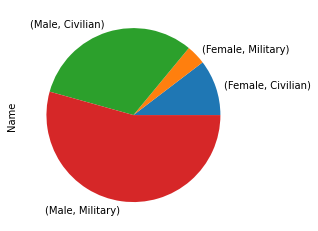

In [121]:
#Group bar chart of gender
fig = df2.plot(x=['Name'].count, y=['Gender','Occupation Field'], kind='pie');